<a href="https://colab.research.google.com/github/harshitsunda19/DeepLearningProjects/blob/Try/final_german_traffic_signs_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## German Traffic Signs Recognition

### GTSRB Dataset

The German Traffic Sign Benchmark is a multi-class, single-image classification database which has 43 different traffic signs under various sizes and in different conditions and sizes. It is a large, life-like database It has about 39000 training set images and 12000 test set images

**Verify NVIDIA GPU**

In [ ]:
!nvidia-smi

Wed Dec 11 10:52:27 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Downloading Dataset from Kaggle 

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

MessageError: ignored

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 599M/612M [00:07<00:00, 81.2MB/s]
100% 612M/612M [00:07<00:00, 85.7MB/s]


Extracting the dataset

In [ ]:
!unzip gtsrb-german-traffic-sign.zip -d signs

Archive:  gtsrb-german-traffic-sign.zip
  inflating: signs/Meta.csv          
  inflating: signs/Meta/.~lock.ClassesInformation.ods#  
  inflating: signs/Meta/.~lock.ClassesInformationStrong.ods#  
  inflating: signs/Meta/0.png        
  inflating: signs/Meta/1.png        
  inflating: signs/Meta/10.png       
  inflating: signs/Meta/11.png       
  inflating: signs/Meta/12.png       
  inflating: signs/Meta/13.png       
  inflating: signs/Meta/14.png       
  inflating: signs/Meta/15.png       
  inflating: signs/Meta/16.png       
  inflating: signs/Meta/17.png       
  inflating: signs/Meta/18.png       
  inflating: signs/Meta/19.png       
  inflating: signs/Meta/2.png        
  inflating: signs/Meta/20.png       
  inflating: signs/Meta/21.png       
  inflating: signs/Meta/22.png       
  inflating: signs/Meta/23.png       
  inflating: signs/Meta/24.png       
  inflating: signs/Meta/25.png       
  inflating: signs/Meta/26.png       
  inflating: signs/Meta/27.png       
  in

Importing Pandas and Numpy libraries. Numpy is used for supporting large multi-dimensional arrays and matrices. Pandas is built on top of Numpy which is used for data manipulation and analysis

In [ ]:
import pandas as pd
import numpy as np

Loading traing datasets

In [ ]:
df_train = pd.read_csv('/content/signs/Train.csv')
df_train['Path'] = df_train['Path'].str.lower()
df_train['ClassId'] = df_train['ClassId'].apply(str)

In [ ]:
df_train.head()

Width  Height  Roi.X1  ...  Roi.Y2  ClassId                            Path
0     27      26       5  ...      20       20  train/20/00020_00000_00000.png
1     28      27       5  ...      22       20  train/20/00020_00000_00001.png
2     29      26       6  ...      21       20  train/20/00020_00000_00002.png
3     28      27       5  ...      22       20  train/20/00020_00000_00003.png
4     28      26       5  ...      21       20  train/20/00020_00000_00004.png

[5 rows x 8 columns]

In [ ]:
df_train.tail()

Width  Height  Roi.X1  ...  Roi.Y2  ClassId                            Path
39204     52      56       5  ...      51       42  train/42/00042_00007_00025.png
39205     56      58       5  ...      53       42  train/42/00042_00007_00026.png
39206     58      62       5  ...      57       42  train/42/00042_00007_00027.png
39207     63      69       5  ...      63       42  train/42/00042_00007_00028.png
39208     68      69       7  ...      63       42  train/42/00042_00007_00029.png

[5 rows x 8 columns]

**One Hot Encoding**: It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype='int8', sparse=False) #Sparse matrix: Most of the elements are zero. int8: Byte (-128 to 127)
y_train = ohe.fit_transform(df_train['ClassId'].values.reshape(-1,1)) #Reshape:To make sure the new shape must be compatible with the original shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


**Data Preprocessing**
It is a technique that is used to convert the raw data into a clean data set. Basically, it means making the data feasible for data analysis from the raw data. This may involve providing the dimensions of the images and Normalizing the images.

Normalizing means bringing the images into the same scale (i.e. between 0 to 1) by dividing the RGB values by 255. Following is the formula of Normalization

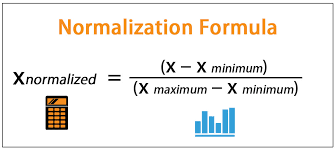

The following Data Preprocessing is done for the training dataset

In [ ]:
import keras
from tqdm import tqdm
from keras.preprocessing import image
train_img = []                          # Creating a list
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('/content/signs/' + df_train['Path'][i], target_size = (64, 64, 3)) #Loading the images and giving the dimensions to the image
    img = image.img_to_array(img)  #For converting images to arrays
    img = img/255 #Normalizing the images by bringing them into same scale by dividing the RGB values by 255
    train_img.append(img)   #Storing the preprocessed images in the list
X = np.array(train_img)

Using TensorFlow backend.


100%|██████████| 39209/39209 [00:18<00:00, 2086.20it/s]


Check the input shape of the images

In [ ]:
X.shape #Check the shape of training images

(39209, 64, 64, 3)

**Display Sample Images**

This can be done with the help of matplotlib library, which is also useful for plotting graphs and creating figures

In [ ]:
import matplotlib 
from matplotlib import pyplot as plt

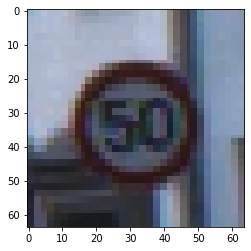

In [ ]:
plt.imshow(X[3909])     #Checking a particular image

Similarly apply Read the test dataset and apply Data Preprocessing 

In [ ]:
df_test = pd.read_csv('/content/signs/Test.csv')
df_test['Path'] = df_test['Path'].str.lower()
df_test['ClassId'] = df_test['ClassId'].apply(str)

In [ ]:
df_test.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2 ClassId            Path
0     53      54       6       5      48      49      16  test/00000.png
1     42      45       5       5      36      40       1  test/00001.png
2     48      52       6       6      43      47      38  test/00002.png
3     27      29       5       5      22      24      33  test/00003.png
4     60      57       5       5      55      52      11  test/00004.png

In [ ]:
df_test.tail()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2 ClassId            Path
12625     42      41       5       6      37      36      12  test/12625.png
12626     50      51       6       5      45      46      33  test/12626.png
12627     29      29       6       6      24      24       6  test/12627.png
12628     48      49       5       6      43      44       7  test/12628.png
12629     32      31       6       5      27      26      10  test/12629.png

In [ ]:
test_img = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('/content/signs/' + df_test['Path'][i], target_size = (64, 64, 3))
    img = image.img_to_array(img)
    img = img/255
    test_img.append(img)
y = np.array(test_img)

100%|██████████| 12630/12630 [00:06<00:00, 2097.06it/s]


In [ ]:
y.shape

(12630, 64, 64, 3)

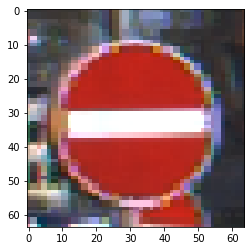

In [ ]:
plt.imshow(y[1000])

## Architecture of the model

The architecture of the model can be modified as per your requirement by changing number of hidden layers, activation functions and other hyperparameters.

In this case, Convolutional Neural network (CNN/ConvNet) Architecture is used. It is a class of Neural Networks that specializes in processing the data that has a grid like topology, such as an image. Since the dataset primarily consists of images, CNN architecure would be suitable here. Following image illustrates the CNN architecture 


![alt text](https://miro.medium.com/max/1569/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)


Activation function, as the name suggests, is the function which calculates the weighted sum & decides whether to activate a neuron or not. 
One such activation function applied in the input layers is the 'ReLU' function.

![alt text](https://miro.medium.com/max/446/1*oePAhrm74RNnNEolprmTaQ.png)

Here, z = Wx + b

Also called 'Rectified Linear Unit', ReLU is used because of its 2 advantages: Sparsity and Reduced likelihood of Vanishing Gradient problem.

In the output layer, Softmax function is used. This function, will squeeze the outputs for each class between 0 & 1 & would also divide by the sum of its outputs. It gives a probability of input being in a particular class.





Keras is an Open Source Neural Network library written in Python that runs on top of Theano or Tensorflow. It is designed to be modular, fast and easy to use. Most of the libraries required to create the architecture of the model requires Keras. 

Loading the necessary libraries required for the architecture for the model

In [ ]:
from keras.models import Sequential  #Helps to create models in a layer by layer architecture
from keras.layers import Dense   #Layers which are connected to each other    
from keras.layers import Conv2D #Convolution 2D: Class of Neural networks that specializes in processing data that has a grid like topology such as an image. Creates a kernel which is further connected wth the input layer
from keras.layers import AveragePooling2D #For reducing the spatial size of the images progressiviely. Average value is taken
from keras.layers import Flatten #For converting the data into a 1-dimensional array for inputting it to the next layer.
from keras.layers import Dropout #For ignoring some of the neurons during the training phase
from keras.layers import BatchNormalization #Normalizes the output of previous activation layer. Inceases stability in the network

Since the model is to be create in a layer by layer architechure, Sequential() is useful in this case

In [ ]:
model = Sequential()

Below the the layer by layer architecture of the model. It is a Convolutional model with the input shape of dimensions 64*64. 
Activation Functions

In [ ]:
model.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu', name = 'first')) #No. of filters: 64: Used for determining No. of kernels to convolve with the input volume.
model.add(AveragePooling2D(pool_size = (2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.30)) 

model.add(Conv2D(64, (3, 3), activation = 'relu'))  #Activation: For deciding whether the neuron is to be activated or not by calculating weighted sum.
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Flatten())

model.add(Dense(128, activation='relu')) #Units: No. of neurons/cells in a layer. ReLU is preffered beacuse of its sparsity and reduced likelihood of vanishing gradient problem 
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(43, activation='softmax', name = 'last')) #Output layer. 












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Compiling the model**

model.compile compiles the loss function, optimizer and metrics.

**Loss Function**: It calculates how poorly our model is performing. It is the function which calculates the difference between the actual output and the predicted output (also known as loss), is called loss function.

Here categorical cross-entropy is used. Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1 and 0 for the other classes. This is suitible for the model since it has multiple classes

**Optimizers**: Optimizers are used to update weights and biases i.e. the internal parameters of a model to reduce the error.
In this case, 'Adam' optimizer is used. Adam or Adaptive Movement Estimation calculates the individual adaptive learning rate for each parameter from estimates of first and second moments of the gradients. It is computationally efficient and has very little memory requirement

**Metrics**: A metric is a function that is used to judge the performance of the model

Accuracy: Calculates how often predictions matches labels.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #CCE: For Multiclass problems

**Check the summary of the model**

It prints a summary representation of the model.
It lists out the Layers, shapes and number of parameters each layer consists of. It also tells the notal number of parameters in the model along with trainable and non-trainable parameters.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 62, 62, 64)        1792      
_________________________________________________________________
average_pooling2d_1 (Average (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)       

Splitting Data into training and test sets

With the help of train_test_split, the dataset can be split into traning and test sets separately. 

In [ ]:
from sklearn.model_selection import train_test_split #For splitting data into training and test sets

In [ ]:
train_df, df_validate = train_test_split(df_train, test_size = 0.30, random_state = 42) #Test_Size: By default 0.25, random_state: for generating random integers when the code is run
train_df = train_df.reset_index(drop = True) #reset_index: sets a list of integer ranging from 0 to length of data as index.
df_test = df_test.reset_index(drop = True)
df_validate = df_validate.reset_index(drop = True)

Show the counts of each class

In [ ]:
train_df['ClassId'].value_counts()

2     1560
1     1538
13    1535
10    1477
38    1451
12    1429
4     1359
5     1329
25    1055
7     1021
9     1001
3      981
8      974
11     969
35     856
18     837
17     764
31     535
14     523
33     479
15     441
26     422
28     384
23     349
16     317
30     312
6      297
34     287
22     266
36     262
40     256
20     250
21     225
39     219
24     188
29     181
32     181
42     173
41     168
27     167
0      146
19     145
37     137
Name: ClassId, dtype: int64

In [ ]:
df_validate['ClassId'].value_counts()

2     690
1     682
12    671
13    625
4     621
38    619
10    533
5     531
9     469
25    445
8     436
3     429
7     419
18    363
11    351
17    346
35    344
14    257
31    245
33    210
15    189
26    178
23    161
28    156
30    138
34    133
36    128
22    124
6     123
20    110
21    105
40    104
16    103
29     89
24     82
39     81
27     73
37     73
41     72
42     67
19     65
0      64
32     59
Name: ClassId, dtype: int64

Plotting the value counts into bar graph (For representaion purposes)

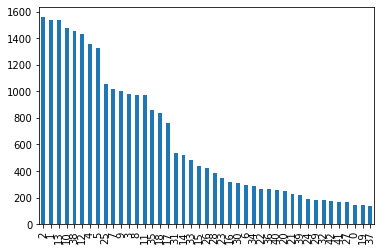

In [ ]:
train_df['ClassId'].value_counts().plot.bar()
plt.show()

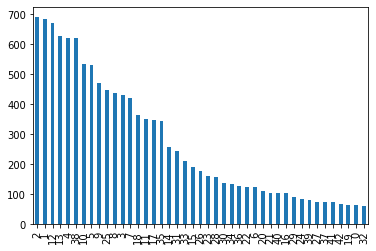

In [ ]:
df_validate['ClassId'].value_counts().plot.bar()
plt.show()

Building image generator for training and validation dataset

ImageDataGenerator is used for artificially increasing the variations of images in our data-set by using horizontal/vertical flips, rotations, variations in brightness of images, horizontal/vertical shifts etc.
This is done to generalize the data and imporve the performance by giving variations.

In [ ]:
train_total = train_df.shape[0] #Gives first component of dimensions 'train_df'
validate_total = df_validate.shape[0]
batch_size = 64

In [ ]:
from keras.preprocessing.image import ImageDataGenerator #Importing library for Generation of images

In [ ]:
train_data_generator = ImageDataGenerator(
        rotation_range = 15,
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
    )

In [ ]:
train_gen = train_data_generator.flow_from_dataframe(
        dataframe = train_df,
        directory = '/content/signs/',
        x_col = 'Path',
        y_col = 'ClassId',
        target_size = (64, 64),
        batch_size = batch_size,
        class_mode = 'categorical',
    )

Found 27446 validated image filenames belonging to 43 classes.


In [ ]:
validate_data_generator = ImageDataGenerator(
        rotation_range = 15,
        rescale = 1./255, #Scaling the value from 0 to 1 from 0-255
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
)

In [ ]:
validate_gen = validate_data_generator.flow_from_dataframe(
        dataframe = df_validate,
        directory = '/content/signs/',
        x_col = 'Path',
        y_col = 'ClassId',
        target_size = (64, 64),
        batch_size = batch_size,
        class_mode = 'categorical'
 )

Found 11763 validated image filenames belonging to 43 classes.


### Train the model

fit_generator: It trains the model over fixed number of epochs(iterations on a dataset)

In this, Epochs refers to the one pass over entire data
steps_per_epoch refers to the one update of the parameters

This is applied on both, training data and validation data generated.

In [ ]:
history = model.fit_generator(
        train_gen,  
        epochs = 200,   #One pass over the entire data
        steps_per_epoch = 150, #One update of the parameters
        validation_data = validate_gen,
        validation_steps = 50
  )


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
150/150 [==============================] - 24s 160ms/step - loss: 3.1000 - acc: 0.2280 - val_loss: 2.3931 - val_acc: 0.4172
Epoch 2/200
150/150 [==============================] - 19s 127ms/step - loss: 2.2279 - acc: 0.4296 - val_loss: 1.6646 - val_acc: 0.5497
Epoch 3/200
150/150 [==============================] - 19s 127ms/step - loss: 1.7159 - acc: 0.5373 - val_loss: 1.3156 - val_acc: 0.6519
Epoch 4/200
150/150 [==============================] - 19s 127ms/step - loss: 1.3732 - acc: 0.6222 - val_loss: 0.9700 - val_acc: 0.7493
Epoch 5/200
150/150 [==============================] - 19s 127ms/step - loss: 1.1407 - acc: 0.6784 - val_loss: 0.7520 - val_acc: 0.7981
Epoch 6/200
150/150 [==============================] - 19s 127ms/step - loss: 1.0145 - acc: 0.7094 - val_loss: 0.6443 - val_acc: 0.8278
Epoch 7/200
150/150 [==============================] - 19s 126ms/step - loss: 0.8728 - a

### Plotting the results on a graph

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


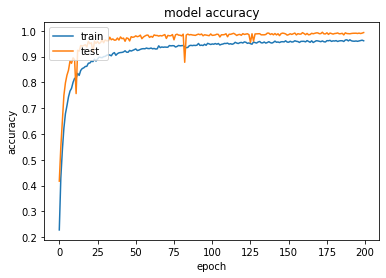

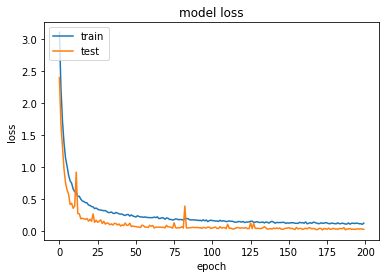

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!nvidia-smi

Wed Dec 11 12:01:04 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    33W / 250W |   1573MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  